In [25]:
import numpy as np
import cartopy
import cartopy.crs as ccrs
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import xarray as xr
import pygrib

In [27]:
data = 'HRRR_latlon.h5'
# Download here: https://hrrrzarr.s3.amazonaws.com/index.html#grid/ 
x = xr.open_dataset(data)
lat = x.latitude.data
lon = x.longitude.data

In [33]:
loc = 'YOUR_PATH'
hrfile = 'rap.t00z.awip32f00.grib2'

grbs = pygrib.open(loc+hrfile)       
for grb in grbs:
    grb

latRAP, lonRAP = grb.latlons()

grbs.close()

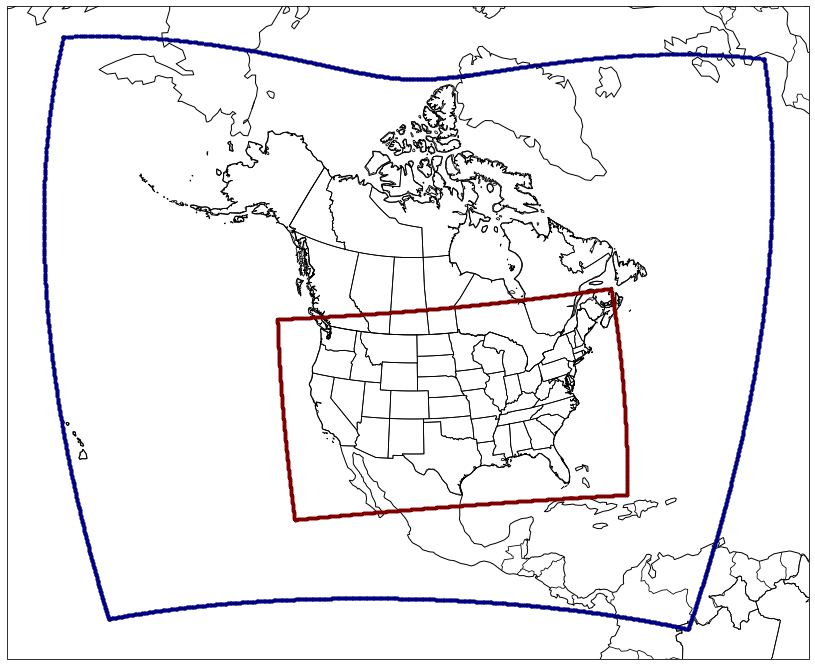

In [79]:
fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection=ccrs.AzimuthalEquidistant(central_longitude=-105, central_latitude=40))

ax.coastlines()
states = cartopy.feature.NaturalEarthFeature(
            category='cultural', scale='50m',facecolor='none',
            name='admin_1_states_provinces_shp')

ax.add_feature(states,edgecolor='black',zorder=97,linewidth=.8)
ax.add_feature(cartopy.feature.BORDERS,edgecolor='black',zorder=97,linewidth=.8)

ax.scatter(lon[-1,:],lat[-1,:],s=5,color='maroon',transform=ccrs.PlateCarree(),zorder=99)
ax.scatter(lon[0,:],lat[0,:],s=5,color='maroon',transform=ccrs.PlateCarree(),zorder=99)
ax.scatter(lon[:,-1],lat[:,-1],s=5,color='maroon',transform=ccrs.PlateCarree(),zorder=99)
ax.scatter(lon[:,0],lat[:,0],s=5,color='maroon',transform=ccrs.PlateCarree(),zorder=99)

ax.scatter(lonRAP[-1,:],latRAP[-1,:],s=10,color='navy',transform=ccrs.PlateCarree(),zorder=99)
ax.scatter(lonRAP[0,:],latRAP[0,:],s=10,color='navy',transform=ccrs.PlateCarree(),zorder=99)
ax.scatter(lonRAP[:,-1],latRAP[:,-1],s=10,color='navy',transform=ccrs.PlateCarree(),zorder=99)
ax.scatter(lonRAP[:,0],latRAP[:,0],s=10,color='navy',transform=ccrs.PlateCarree(),zorder=99)
plt.savefig('PATH.png')